# PLSCI 7201

### This class is designed to give students a primer on experimental design and
### statistical methods important to being a modern plant scientist (or any kind of
### scientist)

_______
## Learning objectives

### 1.  Experimental design
### 2. Apply and interpret linear models
### 3.  Extend methods to large modern datasets

_________
# What this class is not
### Statistics
-  BTRY 6010 and BTRY 6020 (Statistical Methods I,II)
-  STSCI 4030 Linear Models with Matrices
  
### Quantitative genetics/genomics
- BTRY 4830 Quantitative Genetics and Genomics
- PLBR 7170 Quantitative Genetics in Plant Breeding

### Programming
- BTRY 4381 Bioinformatics Programming


## What is statistics?
### 1. **The study of populations**

In [2]:
#Loading libraries
req_packages<-c("ggplot2", "DT")

for(i in c(length(req_packages))){
  if (!require(req_packages[i], character.only = TRUE)){
   install.packages(req_packages[i])
  }
}


Loading required package: DT

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DT’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




In [ ]:

p.chicken <- ggplot(chickwts, aes(x=weight)) +
                    ggtitle("Distribution of Chicken Weights") +
                    xlab("Weight of Chicken") + ylab("Count") +
                    theme_bw(base_size=24) +
                    geom_histogram(bins=30) +
                    theme(panel.background=element_blank(),
                          panel.grid=element_blank())



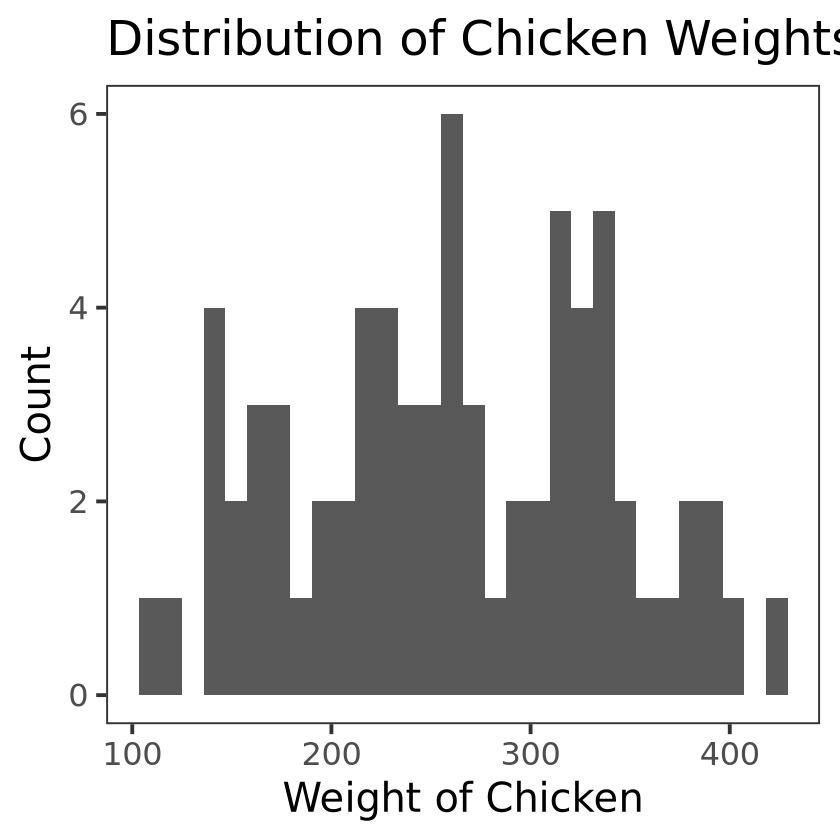

In [ ]:
p.chicken



---

## What is statistics?
### 1. The study of populations
### 2. **The study of variation**


In [ ]:

p.cars <- ggplot(cars, aes(x=speed, y=dist)) +
                    ggtitle("Speed vs. Stopping Distance") +
                    xlab("Car Speed (mph)") + ylab("Stopping dsitance (ft)") +
                    theme_bw(base_size=24) +
                    geom_point(size=3) +
                    theme(panel.background=element_blank(),
                          panel.grid=element_blank())



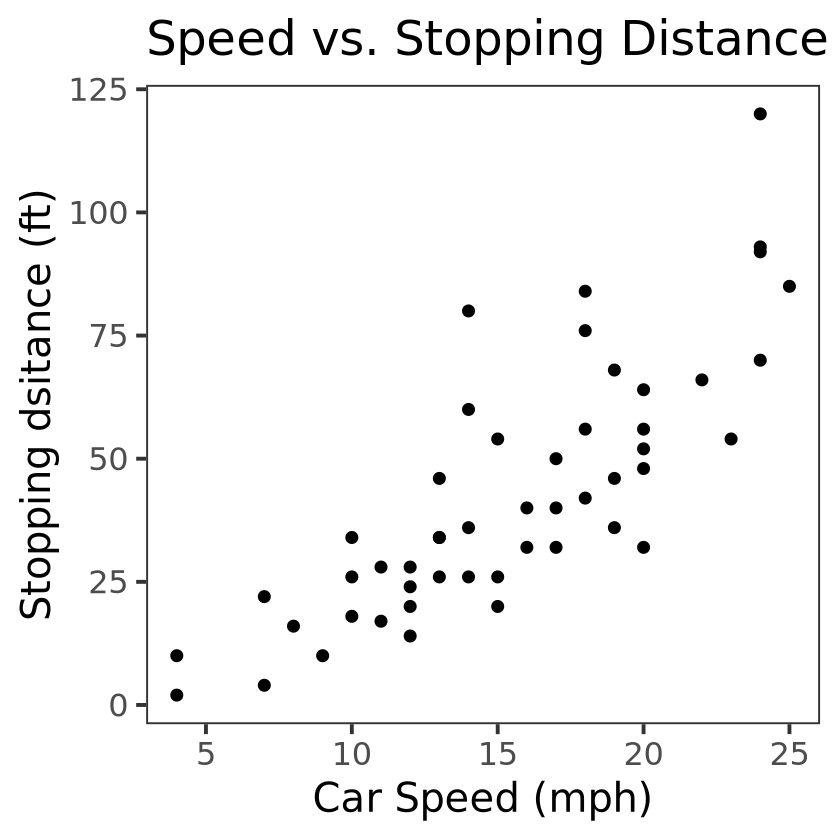

In [ ]:
p.cars



---

## What is statistics?
### 1. The study of populations
### 2. The study of variation
### 3. **The reduction of data**


In [ ]:

datatable(iris)

HTML widgets cannot be represented in plain text (need html)

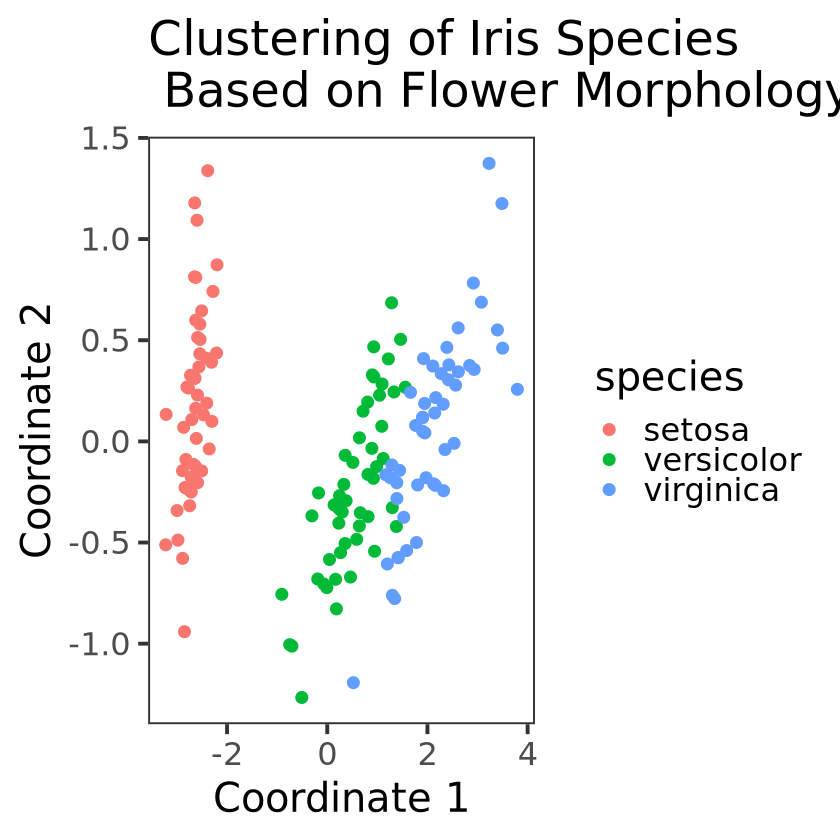

In [ ]:

d <- dist(iris[,1:4])
fit <- cmdscale(d,eig=TRUE, k=2)
df <- data.frame(coord1=fit$points[,1],
                 coord2=fit$points[,2],
                 species=iris[,5])
iris.p <- ggplot(df, aes(x=coord1, y=coord2, color=species)) +
                geom_point(size=3) +
                ggtitle("Clustering of Iris Species \n Based on Flower Morphology")+
                xlab("Coordinate 1") + ylab("Coordinate 2") +
                theme_bw(base_size=24) +
                theme(panel.background=element_blank(),
                      panel.grid=element_blank())
iris.p


---
# Why should I learn statistics and experimental design?

- ## Poor experimental design may make it difficult or even impossible to test hypotheses of interest.

- ## Understanding variation and the factors driving variation enable proper interpretation of results.

- ## Fitting improper models can lead to erroneous conclusions.

# Why do I need to learn programming?


- ## Large datasets cannot be processed manually
- ## Reproducible




![](https://github.com/krr73/PLSCI-7201/blob/main/Modules/Module1/Lecture/images/xkcd.png?raw=1)



---
# Why do I need to learn R?

- ### Popular in statistics and biology/genomics domain
- ###  Easy to use modeling interface
- ### Tidyverse, Bioconductor, document creation, and many other nice things

![](https://github.com/krr73/PLSCI-7201/blob/main/Modules/Module1/Lecture/images/languages.jpg?raw=1)

---
# But in class X we use programming language Z, not Y!

## Python

```python
import pandas as pd
df = pd.read_csv("myData.csv")
for dat in myData["column"]:
  print(dat)
df.to_csv("myfiles.csv")

```



# R
```r
df <- read.csv("myData.csv")
for(dat in myData[,"column"]){
  print(dat)
}
write.csv(df, "myffiles.csv")
```


____
# Installing R and Rstudio



## R
[https://cran.rstudio.com/](https://cran.rstudio.com/)

![](https://github.com/krr73/PLSCI-7201/blob/main/Modules/Module1/Lecture/images/cran.png?raw=1)



## Rstudio IDE
[https://www.rstudio.com/products/rstudio](https://www.rstudio.com/products/rstudio)
![](https://github.com/krr73/PLSCI-7201/blob/main/Modules/Module1/Lecture/images/rstudio.png?raw=1)


_____

# Why use Jupyter

## Easy to integrate formatted text with operation code (R or Python for example)
- ## Great for demonstrating concepts
- ## A flexible way to implement and document workflows (reproducible results)
![](https://github.com/krr73/PLSCI-7201/blob/main/Modules/Module1/Lecture/images/Jupyter.png?raw=1)

# Matrices

- ### Compact representation
- ### Matrix algebra operations simplify computation
- ### Lots of optimized algorithms for storing and operating with matrices




\begin{equation}
  \mathbf{A} = \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9\\
  \end{bmatrix}
\end{equation}

\begin{equation}
  \mathbf{A_{i=2,j=3}} = 6
\end{equation}

\begin{equation}
  \mathbf{A} = \begin{bmatrix}
    \mathbf{B} & \mathbf{C} \\
  \end{bmatrix}
\end{equation}

\begin{equation}
 \mathbf{B } = \begin{bmatrix}
    1 & 2 \\
    4 & 5\\
    7 & 8
  \end{bmatrix}
\end{equation}

\begin{equation}
 \mathbf{C} = \begin{bmatrix}
    3 \\
    6\\
    9
  \end{bmatrix}
\end{equation}


---
# Matrices in action

- ## Consider a simple design with treatment and control



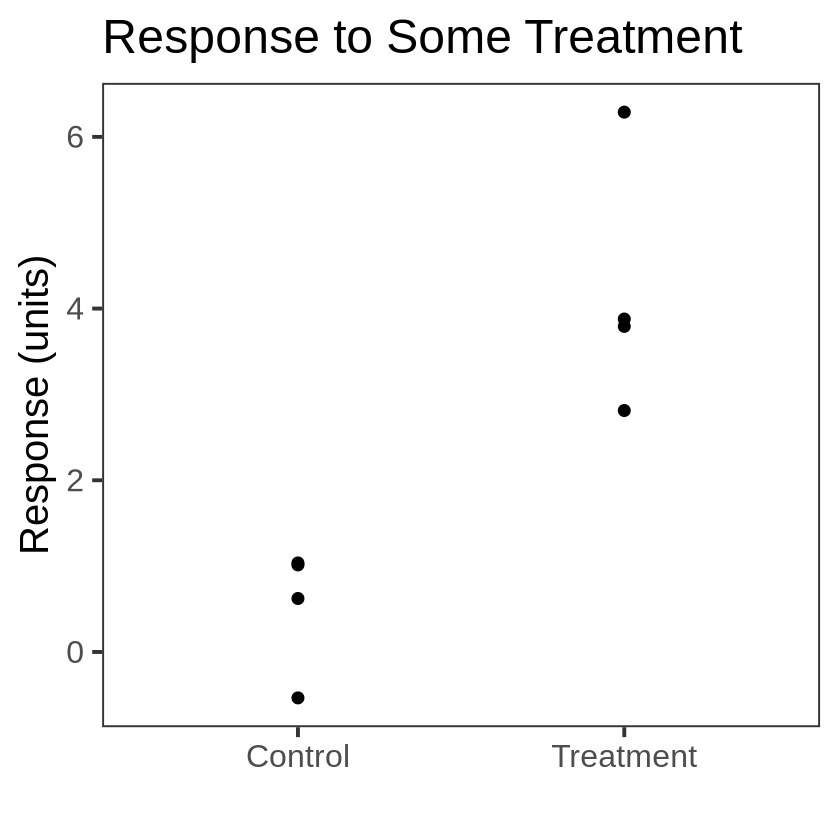

In [ ]:
exampleDf <- data.frame(Outcome=c(rnorm(4,1),rnorm(4,4)),
                        Treatment=c(rep("Control",4), rep("Treatment", 4)),
                        Highlight=as.factor(c(1, rep(0,7))))
p <- ggplot(exampleDf, aes(x=Treatment, y=Outcome)) +
      geom_point(size=3) +
      ggtitle("Response to Some Treatment") +
      xlab("") + ylab("Response (units)") +
      theme_bw(base_size=24) +
      theme(panel.background=element_blank(),
            panel.grid=element_blank())
p


---
- ### Distance between point and group mean = residual





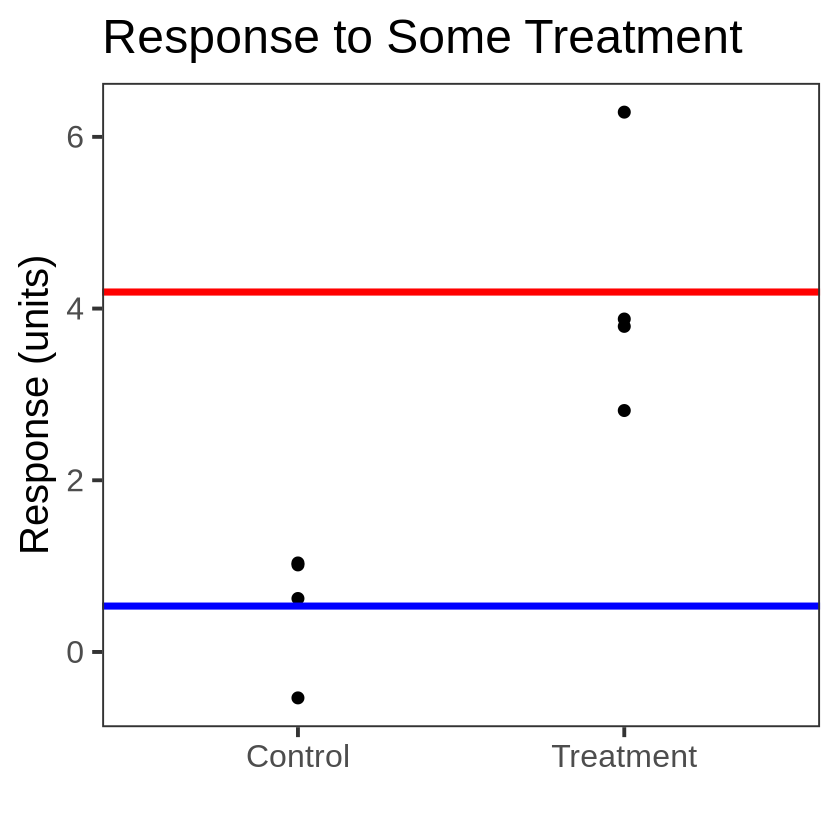

In [ ]:
exampleDf$Highlight<- c(1,0,0,0,0,0,0, 0)
p2 <- p  + geom_hline(yintercept=mean(exampleDf$Outcome[exampleDf$Treatment== "Control"]),
                       linewidth=2, color="blue") +
      geom_hline(yintercept=mean(exampleDf$Outcome[exampleDf$Treatment== "Treatment"]),
                linewidth=2, color="red")
p2




---
- $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual_{1}$





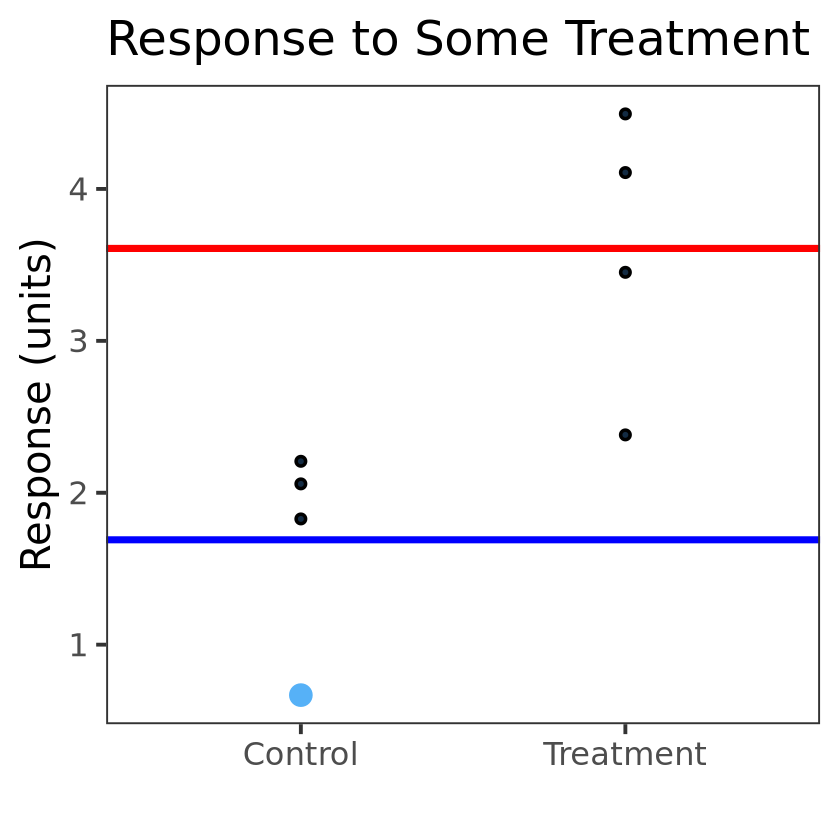

In [ ]:
p3 <- p2 + geom_point(data=exampleDf, aes(x=Treatment, y=Outcome, color=Highlight,size=Highlight)) +
      theme(legend.position="none")
p3

---

- $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual_{1}$
- $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual_{2}$




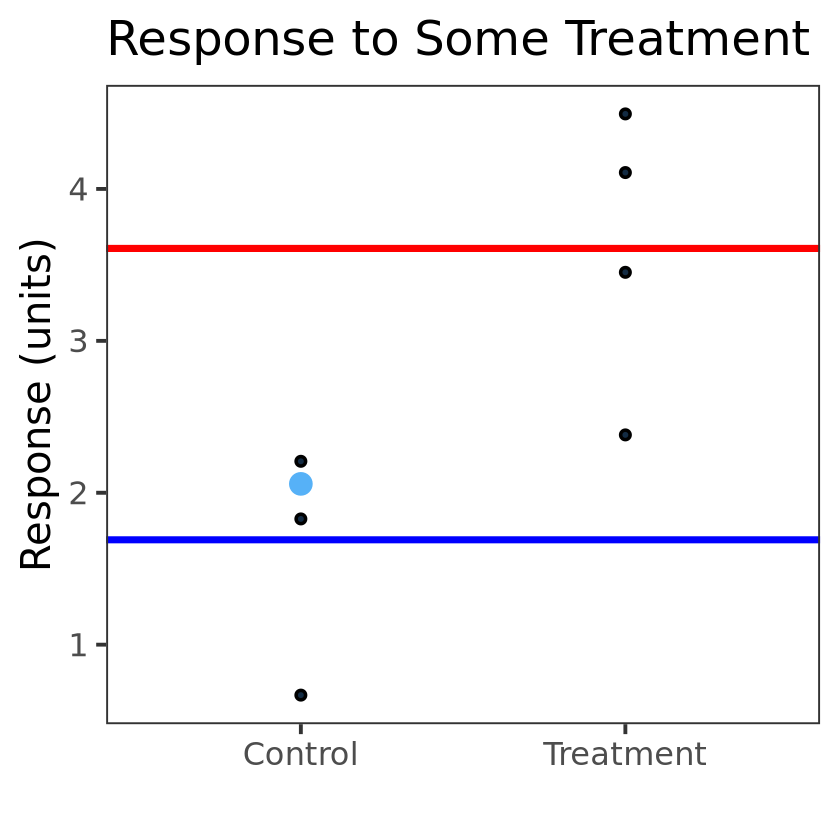

In [ ]:
exampleDf$Highlight <- c(0,1,0,0,0,0,0,0)
p3 <- p2 + geom_point(data=exampleDf, aes(x=Treatment, y=Outcome, color=Highlight,size=Highlight)) +
      theme(legend.position="none")
p3


---
# Matrices in action

- ### Consider a simple design with treatment and control
- ### Distance between point and group mean = residual
 + $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
 + $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
 + $y_{7} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + residual$



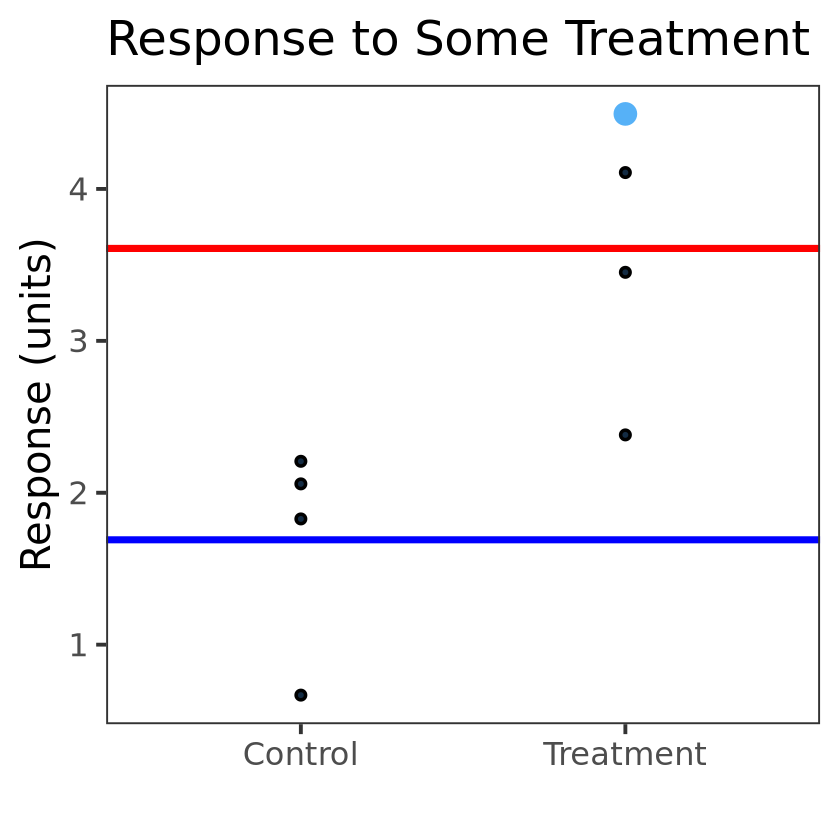

In [ ]:
exampleDf$Highlight <- c(0,0,0,0,0,0,0,1)
p3 <- p2 + geom_point(data=exampleDf, aes(x=Treatment, y=Outcome, color=Highlight,size=Highlight)) +
      theme(legend.position="none")
p3


---
# Matrices in action

- ### Consider a simple design with treatment and control
- ### Distance between point and group mean = residual
 + $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
 + $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
 + $y_{7} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + residual$
 + $y_{8} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + residual$




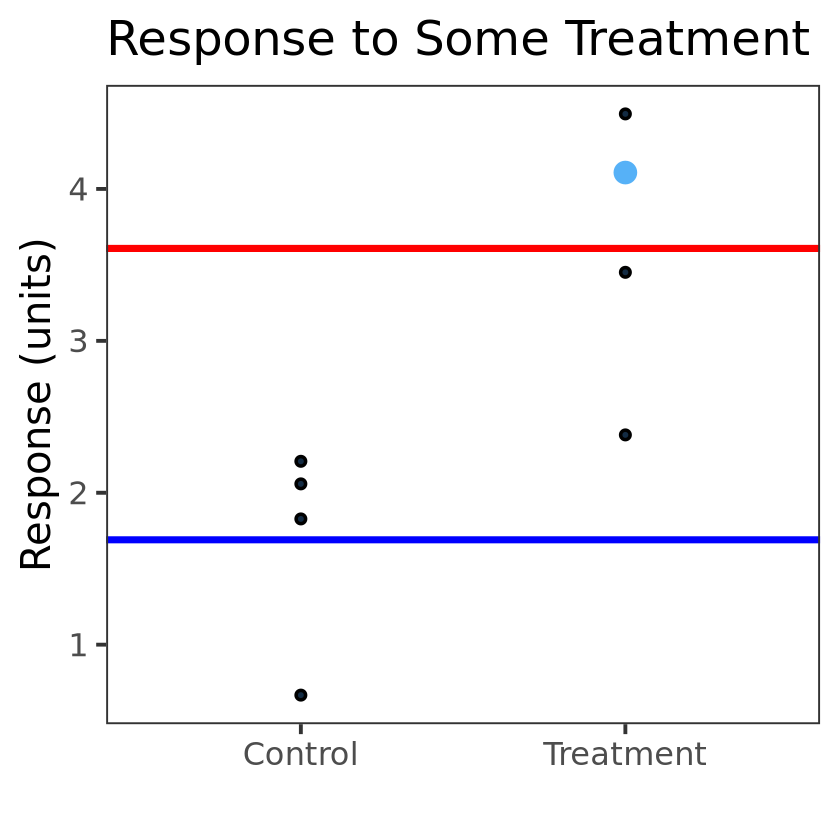

In [ ]:
exampleDf$Highlight <- c(0,0,0,0,1,0,0,0)
p3 <- p2 + geom_point(data=exampleDf, aes(x=Treatment, y=Outcome, color=Highlight,size=Highlight)) +
      theme(legend.position="none")
p3


---
# Matrices in action

- ### Consider a simple design with treatment and control
- ### Distance between point and group mean = residual

### $\mathbf{X} =$
 \begin{equation}
  \begin{bmatrix}
    1 & 0 \\
    1 & 0 \\
    1 & 0 \\
    1 & 0 \\
    0 & 1 \\
    0 & 1 \\
    0 & 1 \\
    0 & 1 \\
  \end{bmatrix}
 \end{equation}

### $\mathbf{\beta} =$
\begin{equation}
 \begin{bmatrix}
  \mu_{blue} \\
  \mu_{red} \\
  \end{bmatrix}
\end{equation}

### $\mathbf{y} =$
\begin{equation}
  \begin{bmatrix}
  y_{1} \\
  y_{2} \\
  y_{3} \\
  y_{4} \\
  y_{5} \\
  y_{6} \\
  y_{7} \\
  y_{8} \\
  \end{bmatrix}
\end{equation}

### $\mathbf{e} =$
\begin{equation}
  \begin{bmatrix}
  e_{1} \\
  e_{2} \\
  e_{3} \\
  e_{4} \\
  e_{5} \\
  e_{6} \\
  e_{7} \\
  e_{8} \\
  \end{bmatrix}
\end{equation}

### $\mathbf{y}=\mathbf{X}\mathbf{\beta}+\mathbf{e}$


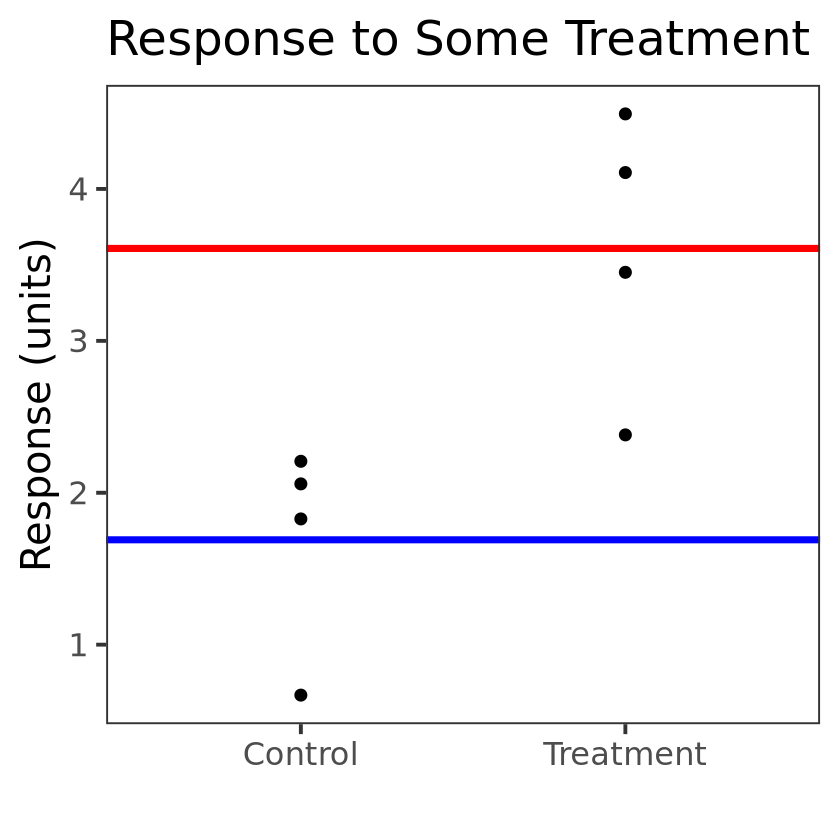

In [ ]:
exampleDf$Highlight <- c(0,0,0,0,1,0,0,0)
p2


---
# Matrix operations



### Transpose
$\mathbf{X}^{t}$ or $\mathbf{X}^{'}$

\begin{equation}
  \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
  \end{bmatrix}^{t} =
  \begin{bmatrix}
    1 & 4 & 7 \\
    2 & 5 & 8 \\
    3 & 6 & 9 \\
  \end{bmatrix}
\end{equation}

### Multiplication
$\mathbf{Z}\mathbf{Y}$
\begin{equation}
  \begin{bmatrix}
    a & b  \\
    c & d \\
  \end{bmatrix}
  \begin{bmatrix}
    A \\
    B\\
  \end{bmatrix} =
  \begin{bmatrix}
    aA + bB \\
    cA + dB\\
  \end{bmatrix}
\end{equation}




### Addition
$\mathbf{A} + \mathbf{B}$
\begin{equation}
  \begin{bmatrix}
    1 & 2  \\
    3 & 4 \\
  \end{bmatrix}
  +
  \begin{bmatrix}
    5 & 6\\
    7 & 8\\
  \end{bmatrix} =
  \begin{bmatrix}
    6 & 8 \\
    10 & 12\\
  \end{bmatrix}
\end{equation}

### Scalar by matrix
$b\mathbf{Q}$
\begin{equation}
  3
  \begin{bmatrix}
    3 & 9\\
    4 & 10\\
  \end{bmatrix} =
  \begin{bmatrix}
    9 & 27 \\
    12 & 30\\
  \end{bmatrix}
\end{equation}



---
# Special matrices


### Column
\begin{equation}
  \begin{bmatrix}
    3 \\
    4 \\
    5 \\
  \end{bmatrix}
\end{equation}
### Row
\begin{equation}
  \begin{bmatrix}
    3  & 4 & 5\\
  \end{bmatrix}
\end{equation}

### Identity
\begin{equation}
  \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
  \end{bmatrix}
\end{equation}




### Symmetrical
\begin{equation}
  \begin{bmatrix}
    1 & 2 & 3 \\
    2 & 1 & 4 \\
    3 & 4 & 1 \\
  \end{bmatrix}
\end{equation}

### Unstructured
\begin{equation}
  \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
  \end{bmatrix}
\end{equation}

---
# Today's Activities

1. ##  Familiarize yourself with Jupyter (not graded)
  + hello-jupyter.ipynb
2. ##  Familiarize yourself with R (not graded)
  + Suggested Swirl modules 1-9 **Prioritize 1,3,4,7 and Homework**
  + [R for Data Science](https://r4ds.had.co.nz/index.html)
3. ## Fun with matrices homework assignment (due before next class)


